# chunked_func
an example for the use of porespy.filters.chunked_func

Applies the function spcified by "func" to the input image in parallel using dask.
If "cores" is 1, one chunk is porcessed at a time, saving memory. If "cores" is larger than one, then multiple cores are processed at once, saving time.

## Import packages

In [1]:
import numpy as np
import porespy as ps
import scipy.ndimage as spim
import matplotlib.pyplot as plt
import skimage
from skimage.morphology import ball
ps.visualization.set_mpl_style()

## Create image and variables

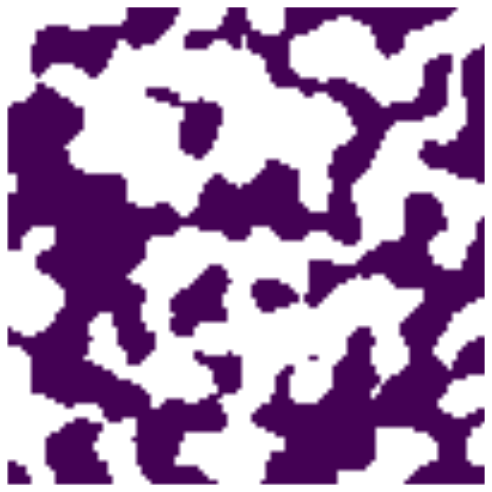

In [2]:
func = spim.binary_dilation
im = ps.generators.blobs(shape=[100, 100, 100])
kwargs = {"input": im, "structure" : ball(3)}

plt.subplots(figsize=[7, 7])
ps.visualization.imshow(im)
plt.axis(False)

#default values:
overlap = None
divs = 2
cores = None
im_arg = ["input", "image", "im"]
strel_arg = ["strel", "structure", "footprint"]

## Apply filter function

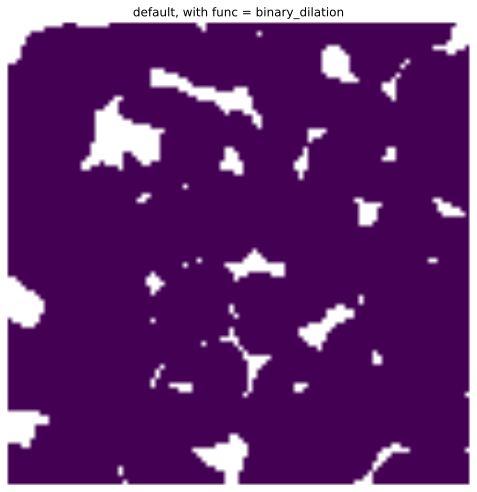

In [3]:
x = ps.filters.chunked_func(func =func, overlap = overlap, divs=divs, cores= cores, im_arg=im_arg, strel_arg= strel_arg, **kwargs)

fig, ax = plt.subplots(figsize=[7, 7]);
ps.visualization.imshow(x)
plt.axis(False)
plt.title('default, with func = binary_dilation');

### func

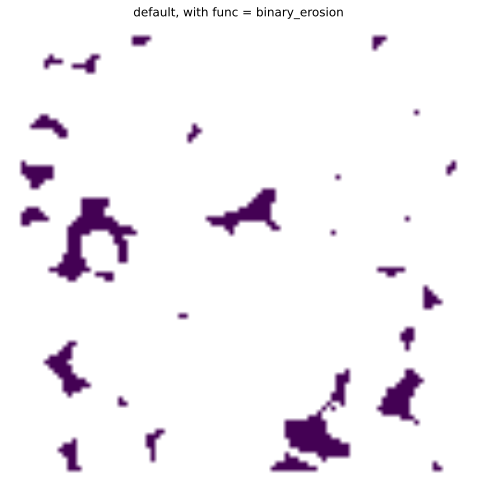

In [4]:
f2 = spim.binary_erosion
xx = ps.filters.chunked_func(func =f2, overlap = overlap, divs=divs, cores= cores, im_arg=im_arg, strel_arg= strel_arg, **kwargs)

fig, ax = plt.subplots(figsize=[7, 7]);
ps.visualization.imshow(xx)
plt.axis(False)

plt.title('default, with func = binary_erosion');

### overlap

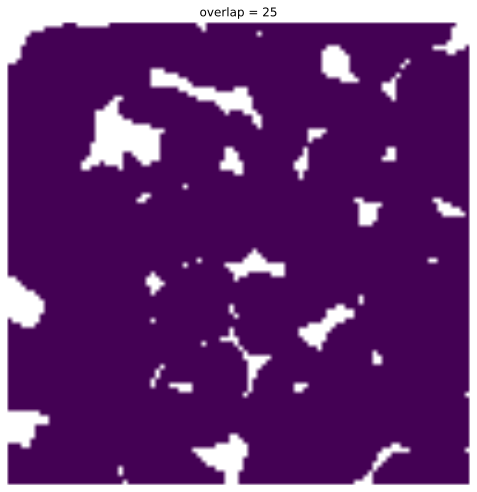

In [5]:
xx = ps.filters.chunked_func(func, overlap =25,  divs=divs, cores= cores, im_arg=im_arg, strel_arg= strel_arg, **kwargs)

fig, ax = plt.subplots(figsize=[7, 7]);
ps.visualization.imshow(xx)
plt.axis(False)
plt.title('overlap = 25');

### divs

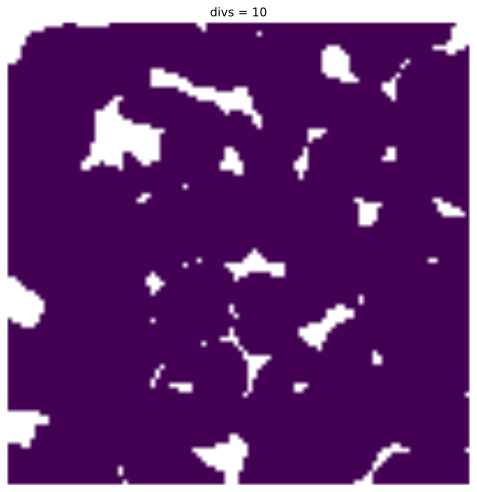

In [6]:
xx = ps.filters.chunked_func(func, overlap, divs=10, cores= cores, im_arg=im_arg, strel_arg= strel_arg, **kwargs)

fig, ax = plt.subplots(figsize=[7, 7]);
ps.visualization.imshow(xx)
plt.axis(False)
plt.title('divs = 10');

### cores

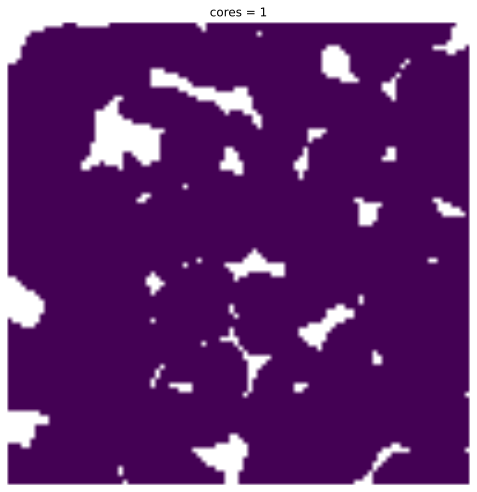

In [7]:
xx = ps.filters.chunked_func(func, overlap, divs, cores = 1, im_arg=im_arg, strel_arg= strel_arg, **kwargs)

fig, ax = plt.subplots(figsize=[7, 7]);
ps.visualization.imshow(xx)
plt.axis(False)
plt.title('cores = 1');